## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://github.com/astec-stfc/masterlattice/) and [SimCodes](https://github.com/astec-stfc/simcodes/) repositories have been cloned, and that they are accessible at the same directory level as SimFrame. Alternatively, these can be installed via `setup.py` in their respective directories, in which case they do not have to be provided on instantiation.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../../../../")
import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        master_lattice='../../../../../masterlattice/MasterLattice/',
        simcodes='../../../../../simcodes/SimCodes',
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

initializing ocelot...


### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [2]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [3]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [6]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [7]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [8]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [9]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [10]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090)

Generate and track the bunch 

In [11]:
framework.track(startfile=startline, endfile=endline)

/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:904: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")
/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:935: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")


The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [2]:
fwdir = load_directory("./getting_started", beams=True)

Found MasterLattice Package = /home/xkc85723/Documents/masterlattice/MasterLattice/./
Found SimCodes Package = /home/xkc85723/Documents/simcodes/SimCodes/./


/home/xkc85723/Documents/venv/lib/python3.12/site-packages/pydantic/functional_serializers.py:434: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int64` with value `np.int64(2998500000)` - serialized value may not be as expected
  lambda x, h: h(x), schema=core_schema.any_schema()
/home/xkc85723/Documents/venv/lib/python3.12/site-packages/pydantic/functional_serializers.py:434: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int64` with value `np.int64(11994000000)` - serialized value may not be as expected
  lambda x, h: h(x), schema=core_schema.any_schema()


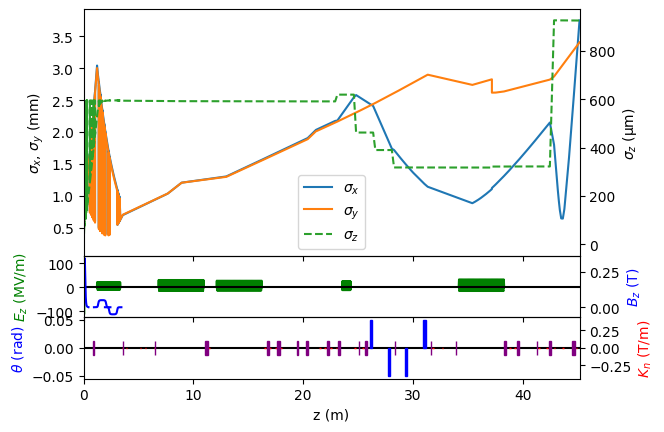

In [3]:
plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])